## Imports

In [5]:
import numpy as np
import pandas as pd
import math

In [4]:
#data cleaning
import clean
import preproc

#RNN cleaning
from RNN_preproc_uni import get_train_test


In [20]:
#model
from tensorflow.keras import models
from tensorflow.keras import layers
from tensorflow.keras import optimizers, metrics
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.preprocessing import RobustScaler
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns
import datetime
from datetime import date, timedelta
from clean import clean_all, get_data, get_bairros_data
from preproc import get_format, get_popfile, clean_pop_data, extract_ts
idx = pd.IndexSlice

## Data

In [7]:
data1, data2, data3, data4 = clean.get_data()
data = clean.clean_all(data1, data2, data3, data4, clean.get_bairros_data())

In [99]:
preproc_data_n, preproc_data_rate = preproc.get_format(data)

In [53]:
X_train, y_train, X_test, y_test = get_train_test(preproc_data_rate, 1000, 100, "all_AR")


In [122]:
X_train.shape,y_train.shape, X_test.shape, y_test.shape

((30000, 69, 1), (30000, 31), (7500, 69, 1), (7500, 31))

## Model

In [70]:
def init_model():
    metric = metrics.MAPE
    opt = optimizers.RMSprop(learning_rate=0.001)
    
    model = models.Sequential()
    model.add(layers.LSTM(30, return_sequences=True, activation='tanh',input_shape = (69,1)))
    model.add(layers.LSTM(10, activation='tanh'))
    model.add(layers.Dense(5, activation='relu'))
    model.add(layers.Dense(31, activation='linear'))
    
    model.compile(loss='mse', 
                  optimizer=opt, 
                  metrics=[metric])
    
    return model

In [71]:
es = EarlyStopping(monitor='val_loss', verbose=1, patience=20, restore_best_weights=True)

In [75]:
# Fitting the model
def fit(model,x,y):
    hist = model.fit(x, y,
            validation_split=0.3,
            epochs=100, 
            batch_size=16,
            callbacks=[es], verbose=1)
    return hist

In [77]:
model = init_model()
history = fit(model, X_train,y_train)

Epoch 1/100
1313/1313 [==============================] - 28s 21ms/step - loss: 0.0629 - mean_absolute_percentage_error: 4616817.5000 - val_loss: 0.0373 - val_mean_absolute_percentage_error: 5478438.5000
Epoch 2/100
1313/1313 [==============================] - 26s 20ms/step - loss: 0.0575 - mean_absolute_percentage_error: 3387370.2500 - val_loss: 0.0368 - val_mean_absolute_percentage_error: 4789287.0000
Epoch 3/100
1313/1313 [==============================] - 27s 20ms/step - loss: 0.0572 - mean_absolute_percentage_error: 3305363.5000 - val_loss: 0.0372 - val_mean_absolute_percentage_error: 5730419.5000
Epoch 4/100
1313/1313 [==============================] - 27s 21ms/step - loss: 0.0569 - mean_absolute_percentage_error: 3017027.5000 - val_loss: 0.0371 - val_mean_absolute_percentage_error: 5263562.5000
Epoch 5/100
1313/1313 [==============================] - 29s 22ms/step - loss: 0.0564 - mean_absolute_percentage_error: 3055324.0000 - val_loss: 0.0365 - val_mean_absolute_percentage_error

In [ ]:
model.summary()

In [108]:
y_pred = history.model.predict(X_test)

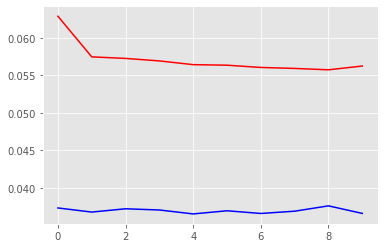

In [109]:
plt.plot(history.history["loss"],c="red")
plt.plot(history.history["val_loss"], c="blue")

In [110]:
y_pred[0]

array([0.06694505, 0.05708362, 0.06478121, 0.0646767 , 0.07124957,
       0.0748716 , 0.07639346, 0.06429172, 0.068132  , 0.0657177 ,
       0.06321584, 0.06258178, 0.05841917, 0.07591002, 0.0572112 ,
       0.06980667, 0.0551866 , 0.07127147, 0.06655423, 0.06241835,
       0.06208825, 0.06504498, 0.07422002, 0.06994797, 0.06799629,
       0.07231959, 0.06371002, 0.06010365, 0.07260268, 0.06860343,
       0.06529902], dtype=float32)

In [123]:
y_test.shape, y_pred.shape

((7500, 31), (7500, 31))

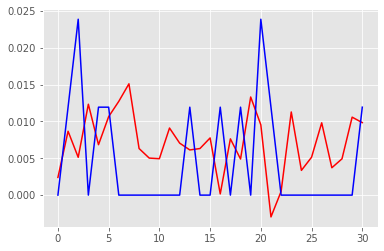

In [125]:
plt.plot(range(31),y_pred[6000],color="r")
plt.plot(range(31),y_test[6000],color="b")

In [126]:
data=preproc_data_rate.droplevel(level=0,axis=1)

In [134]:
sample_len = 100
df = data

pred_len = 31
len_ = int(0.8*df.shape[0])
df_test = df[len_:]
size = int((df_test.shape[0]-(sample_len-pred_len))/pred_len)+1
for i in range(size):
    data_select = np.array(df_test[i*pred_len:i*pred_len+(sample_len-pred_len)])
    #order_test_data = 
data_select.shape

(69, 30)

In [101]:
length = 100
y_pred = []
len_ = int(0.8*data.shape[0])
data_test = data[len_:]
for i in range(int((804-(length-31))/31)+1):
    data_test_temp = data_test[i*31:i*31+(length-31)]
    data_test_temp = np.array(data_test_temp)
    data_test_temp = data_test_temp.reshape(1,(length-31),1)
    y_pred_temp = history.model.predict(data_test_temp).tolist()[0]
    y_pred = y_pred + y_pred_tem
y_pred_df = pd.DataFrame(y_pred)
y_pred_df["index"] = y_pred_df.index + 3214+(length-31) # create index that will match input table
y_pred_df = y_pred_df.set_index("index")
actual = data_test[(length-31):]# take first predicted value from actual data until the end
plt.figure(figsize=(16,6))
plt.plot(actual, c= "blue")
plt.plot(y_pred_df, c="red")

ValueError: cannot reshape array of size 2070 into shape (1,69,1)

In [102]:
i=0
data_test_temp = data_test[i*31:i*31+(length-31)]
data_test_temp = np.array(data_test_temp)

In [78]:
def compute_plot_pred(data,length):
    
    '''compute and plot prediction over test time period and overlay with actual data'''
    y_pred = []
    len_ = int(0.8*data.shape[0])
    data_test = data[len_:]
    for i in range(int((804-(length-31))/31)+1):
        data_test_temp = data_test[i*31:i*31+(length-31)]
        data_test_temp = data_test_temp
        data_test_temp = np.array(data_test_temp)
        data_test_temp = data_test_temp.reshape(1,(length-31),1)
        y_pred_temp = history.model.predict(data_test_temp).tolist()[0]
        y_pred = y_pred + y_pred_tem
    y_pred_df = pd.DataFrame(y_pred)
    y_pred_df["index"] = y_pred_df.index + 3214+(length-31) # create index that will match input table
    y_pred_df = y_pred_df.set_index("index")
    actual = data_test[(length-31):]# take first predicted value from actual data until the end
    #actual =actual
    plt.figure(figsize=(16,6))
    plt.plot(actual, c= "blue")
    plt.plot(y_pred_df, c="red"
    _, _, X_test, y_test = get_train_test(data,2000,length)
    res = model.evaluate(X_test, y_test, verbose=0)
    print(f"performances computed on test set:{res}")
    return y_pre

SyntaxError: invalid syntax (550237795.py, line 22)